In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [0]:
#Load in the data
from sklearn.datasets import load_breast_cancer

In [4]:
#load data
data = load_breast_cancer()

type(data)

sklearn.utils.Bunch

In [5]:
#bunch is a object
#it basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target.shape

(569,)

In [8]:
#check target
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#building tensor flow model and running
model = tf.keras.models.Sequential([
                                    tf.keras.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Alternative
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation="sigmoid"))
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [13]:
#train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=100)
#evaluate the model return loss and accuracy
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

print("Train Score {}".format(train_score))
print("Test Score {}".format(test_score))


Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 2ms/sample - loss: 0.4333 - accuracy: 0.8110 - val_loss: 0.4208 - val_accuracy: 0.8138
Epoch 2/100
381/381 [==============================] - 0s 83us/sample - loss: 0.4036 - accuracy: 0.8373 - val_loss: 0.3962 - val_accuracy: 0.8138
Epoch 3/100
381/381 [==============================] - 0s 86us/sample - loss: 0.3773 - accuracy: 0.8556 - val_loss: 0.3747 - val_accuracy: 0.8245
Epoch 4/100
381/381 [==============================] - 0s 79us/sample - loss: 0.3540 - accuracy: 0.8714 - val_loss: 0.3563 - val_accuracy: 0.8298
Epoch 5/100
381/381 [==============================] - 0s 112us/sample - loss: 0.3337 - accuracy: 0.8766 - val_loss: 0.3402 - val_accuracy: 0.8298
Epoch 6/100
381/381 [==============================] - 0s 91us/sample - loss: 0.3159 - accuracy: 0.8871 - val_loss: 0.3263 - val_accuracy: 0.8245
Epoch 7/100
381/381 [==============================] - 0s 81us/sample - loss: 

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/tensorflow

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/tensorflow


In [0]:
model.save("linearclassifier.h5")

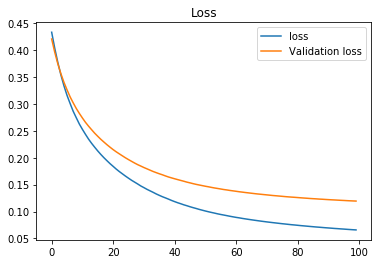

In [14]:
#plot the return of model.fit
import matplotlib.pyplot as plt
plt.title("Loss")
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

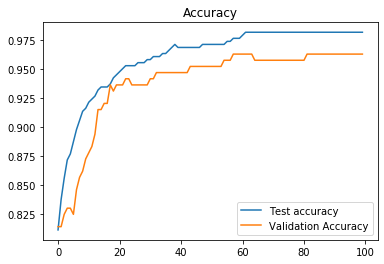

In [15]:
#plot accuracy
import matplotlib.pyplot as plt
plt.title("Accuracy")
plt.plot(r.history["accuracy"], label="Test accuracy")
plt.plot(r.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

#Making Predictions

In [16]:
p = model.predict(X_test)
print(p)

[[9.97014999e-01]
 [9.68206048e-01]
 [3.45840526e-05]
 [3.67714005e-04]
 [9.92533922e-01]
 [4.50161248e-02]
 [5.41809726e-08]
 [6.63321614e-02]
 [2.49220640e-04]
 [9.99775946e-01]
 [9.99334753e-01]
 [9.35495436e-01]
 [5.59145629e-01]
 [9.73275363e-01]
 [5.45391023e-01]
 [9.90946293e-01]
 [9.99793708e-01]
 [9.80858982e-01]
 [9.95619953e-01]
 [9.99717772e-01]
 [9.96562779e-01]
 [1.42610921e-02]
 [8.19127877e-10]
 [4.91112478e-05]
 [9.99311924e-01]
 [1.53225918e-10]
 [9.99647260e-01]
 [9.31245863e-01]
 [9.56246138e-01]
 [8.64901781e-01]
 [9.99202192e-01]
 [9.99719679e-01]
 [1.25953287e-03]
 [5.36068669e-03]
 [3.62110108e-01]
 [1.24984503e-01]
 [9.30695415e-01]
 [2.54623475e-03]
 [9.95949864e-01]
 [6.29136309e-07]
 [9.89922822e-01]
 [1.18829403e-05]
 [8.71652842e-01]
 [2.00766284e-04]
 [9.96528447e-01]
 [9.94117856e-01]
 [9.99276221e-01]
 [9.68514025e-01]
 [9.98802543e-01]
 [4.51309383e-02]
 [6.80428784e-05]
 [9.99689102e-01]
 [9.99838233e-01]
 [2.59846635e-03]
 [9.58303988e-01]
 [7.999179

In [0]:
import numpy as np
p = np.round(p).flatten()

In [19]:
print("manually calculated accuracy = ", np.mean(p == y_test))
print("model evaluate = ", model.evaluate(X_test, y_test))

manually calculated accuracy =  0.9627659574468085
188/188 [==============================] - 0s 56us/sample - loss: 0.1194 - accuracy: 0.9628
model evaluate =  [0.11943436778606252, 0.96276593]


In [24]:
#loadingmodel
loadmodel = tf.keras.models.load_model("linearclassifier.h5")
loadmodel.evaluate(X_test,y_test)

188/188 [==============================] - 0s 338us/sample - loss: 0.1194 - accuracy: 0.9628


[0.11943436778606252, 0.96276593]